## Apparel Size Prediction for Kenyan E-Commerce Using Supervised Learning

**Project Description**  
This project focuses on building a predictive model that recommends the most appropriate clothing size (e.g., XS, S, M, L, XL)  
for users based on their physical attributes such as height, weight, age, gender, bust, hips, and chest measurements.  
The goal is to enhance the online shopping experience by reducing size mismatches and returns—one of the biggest challenges in e-commerce fashion.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clothing_size_prediction_dataset.csv")

In [3]:
df.head(10)

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label
0,172.967142,53.288780,59.0,NaN,114.164543,100.802850,Male,XS
1,166.617357,60.536037,30.0,106.692469,104.138267,NaN,Female,S
2,174.476885,55.869097,58.0,81.157240,109.416462,NaN,Female,S
3,183.230299,61.780063,23.0,85.127791,97.886097,NaN,Female,S
4,165.658466,66.787745,NaN,92.123801,85.230682,NaN,Female,M
5,165.658630,82.557317,33.0,NaN,96.281076,103.539581,Male,L
6,183.792128,65.182614,22.0,NaN,100.924210,97.795906,Male,M
7,175.674347,46.215614,62.0,NaN,102.038074,NaN,Male,XS
8,163.305256,87.101018,51.0,NaN,90.275879,103.453162,Male,L
9,173.425600,57.443648,23.0,78.594215,99.887865,NaN,Female,S


In [4]:
df.shape

(6000, 8)

In [5]:
# Check initial data info
print("Initial Data Overview:")
print(df.info())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height_cm   5700 non-null   float64
 1   weight_kg   5700 non-null   float64
 2   age         5700 non-null   float64
 3   bust_cm     2854 non-null   float64
 4   hips_cm     5700 non-null   float64
 5   chest_cm    2862 non-null   float64
 6   gender      6000 non-null   object 
 7   size_label  6000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 375.1+ KB
None


# Checking and filling missing values

In [6]:
# Check missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
height_cm      300
weight_kg      300
age            300
bust_cm       3146
hips_cm        300
chest_cm      3138
gender           0
size_label       0
dtype: int64


**Handle Missing Values & Create Unified Feature**

In [7]:
# Fill bust and chest separately
df['bust_cm'] = df['bust_cm'].fillna(df[df['gender'] == 'Female']['bust_cm'].median())
df['chest_cm'] = df['chest_cm'].fillna(df[df['gender'] == 'Male']['chest_cm'].median())

In [8]:
# Unified measurement column
df['measurement_cm'] = df.apply(lambda row: row['bust_cm'] if row['gender'] == 'Female' else row['chest_cm'], axis=1)

In [9]:
# Drop originals
df.drop(['bust_cm', 'chest_cm'], axis=1, inplace=True)

In [10]:
df.head()

,height_cm,weight_kg,age,hips_cm,gender,size_label,measurement_cm
0,172.967142,53.288780,59.0,114.164543,Male,XS,100.802850
1,166.617357,60.536037,30.0,104.138267,Female,S,106.692469
2,174.476885,55.869097,58.0,109.416462,Female,S,81.157240
3,183.230299,61.780063,23.0,97.886097,Female,S,85.127791
4,165.658466,66.787745,NaN,85.230682,Female,M,92.123801


In [11]:
# Fill other missing values
for col in ['height_cm', 'weight_kg', 'age', 'hips_cm']:
    df[col] = df[col].fillna(df[col].median())

In [12]:
df.isna().sum()

height_cm         0
weight_kg         0
age               0
hips_cm           0
gender            0
size_label        0
measurement_cm    0
dtype: int64

In [13]:
df.describe()

,height_cm,weight_kg,age,hips_cm,measurement_cm
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168.749763,70.494589,41.147667,94.972634,94.983446
std,12.437727,15.977374,13.236820,9.550898,10.923627
min,135.587327,30.000000,18.000000,58.449135,55.343961
25%,161.749954,60.568568,30.000000,88.588033,87.841622
50%,168.140393,69.940923,41.000000,94.986812,94.986050
75%,174.452557,79.734226,52.000000,101.155905,101.989182
max,250.000000,186.612810,64.000000,131.113501,136.916245


**Checking for outliers**

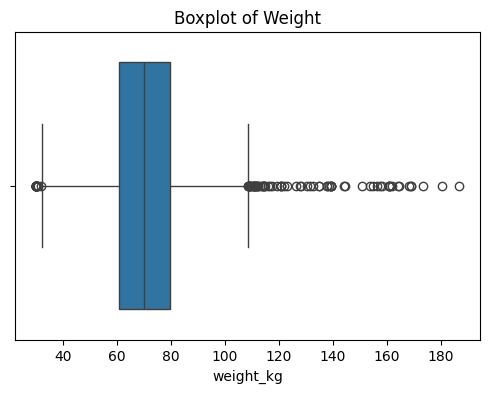

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['weight_kg'])
plt.title("Boxplot of Weight")
plt.show()

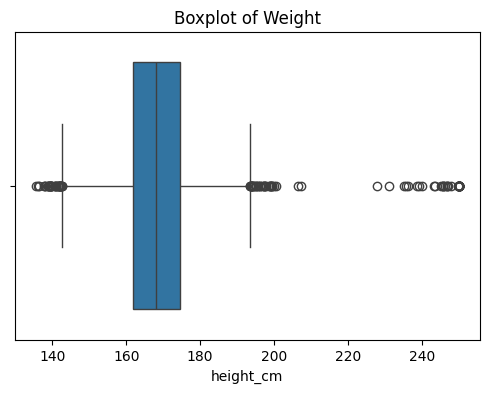

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['height_cm'])
plt.title("Boxplot of Weight")
plt.show()

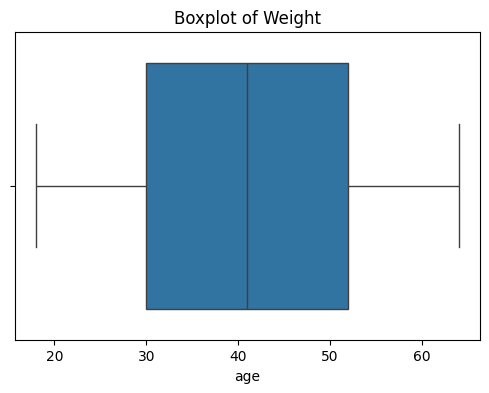

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.title("Boxplot of Weight")
plt.show()

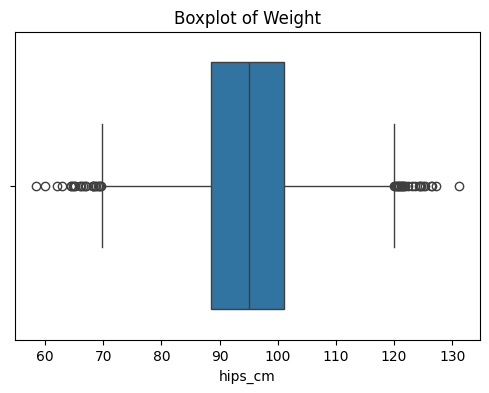

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['hips_cm'])
plt.title("Boxplot of Weight")
plt.show()

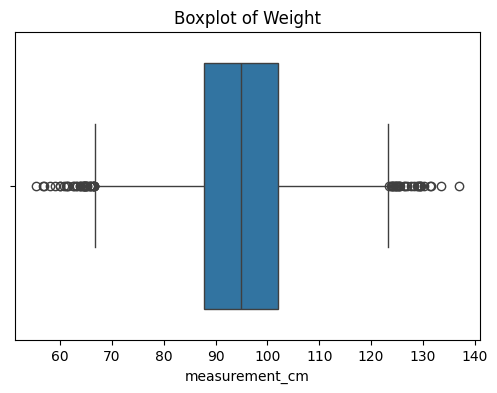

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['measurement_cm'])
plt.title("Boxplot of Weight")
plt.show()

Feature	Outlier Count:  
height_cm: 129    
weight_kg: 110   
age: 0  
hips_cm: 48  
measurement_cm: 67  
The boxplots visually confirm these outliers.  
No outliers were found in age, suggesting the values fall within a consistent range.  

**Winsorize Outliers**

In [19]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from scipy.stats.mstats import winsorize

In [21]:
numeric_cols = ['height_cm','weight_kg','hips_cm','age','measurement_cm']
for col in numeric_cols:
    df[col] = winsorize(df[col], limits =[0.01,0.01])

**Visualizations**

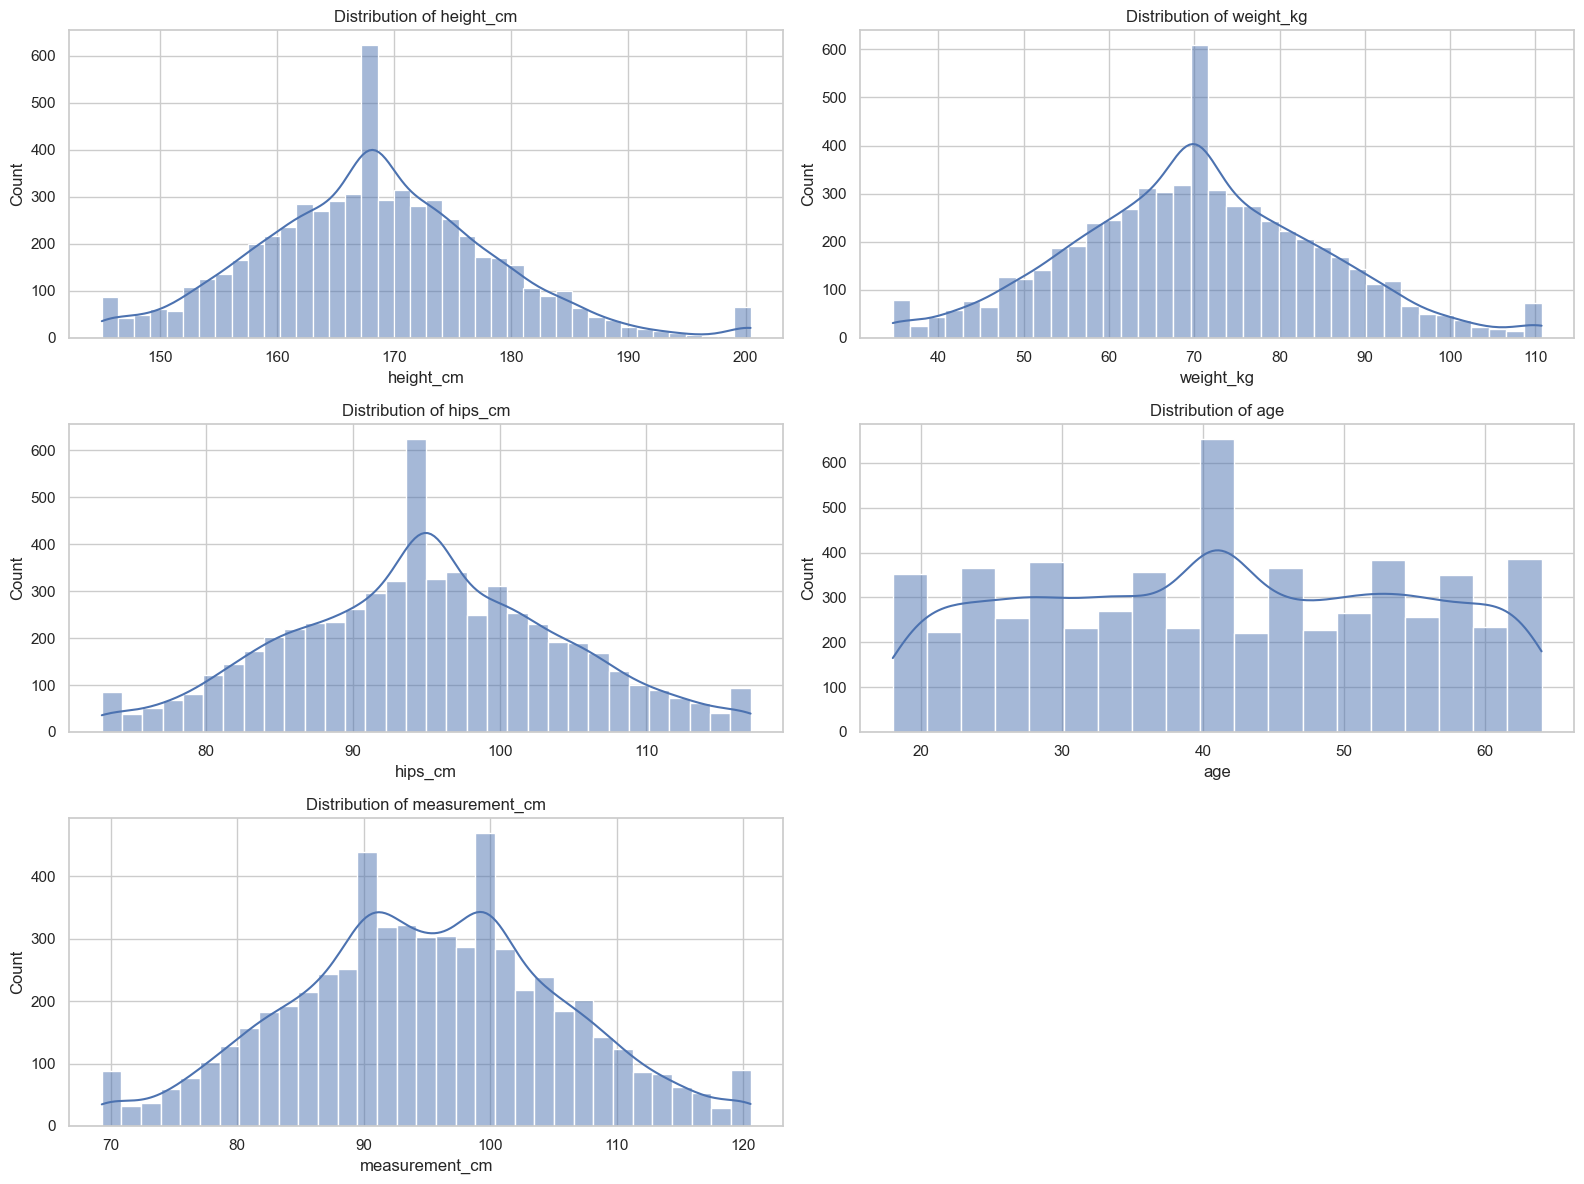

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

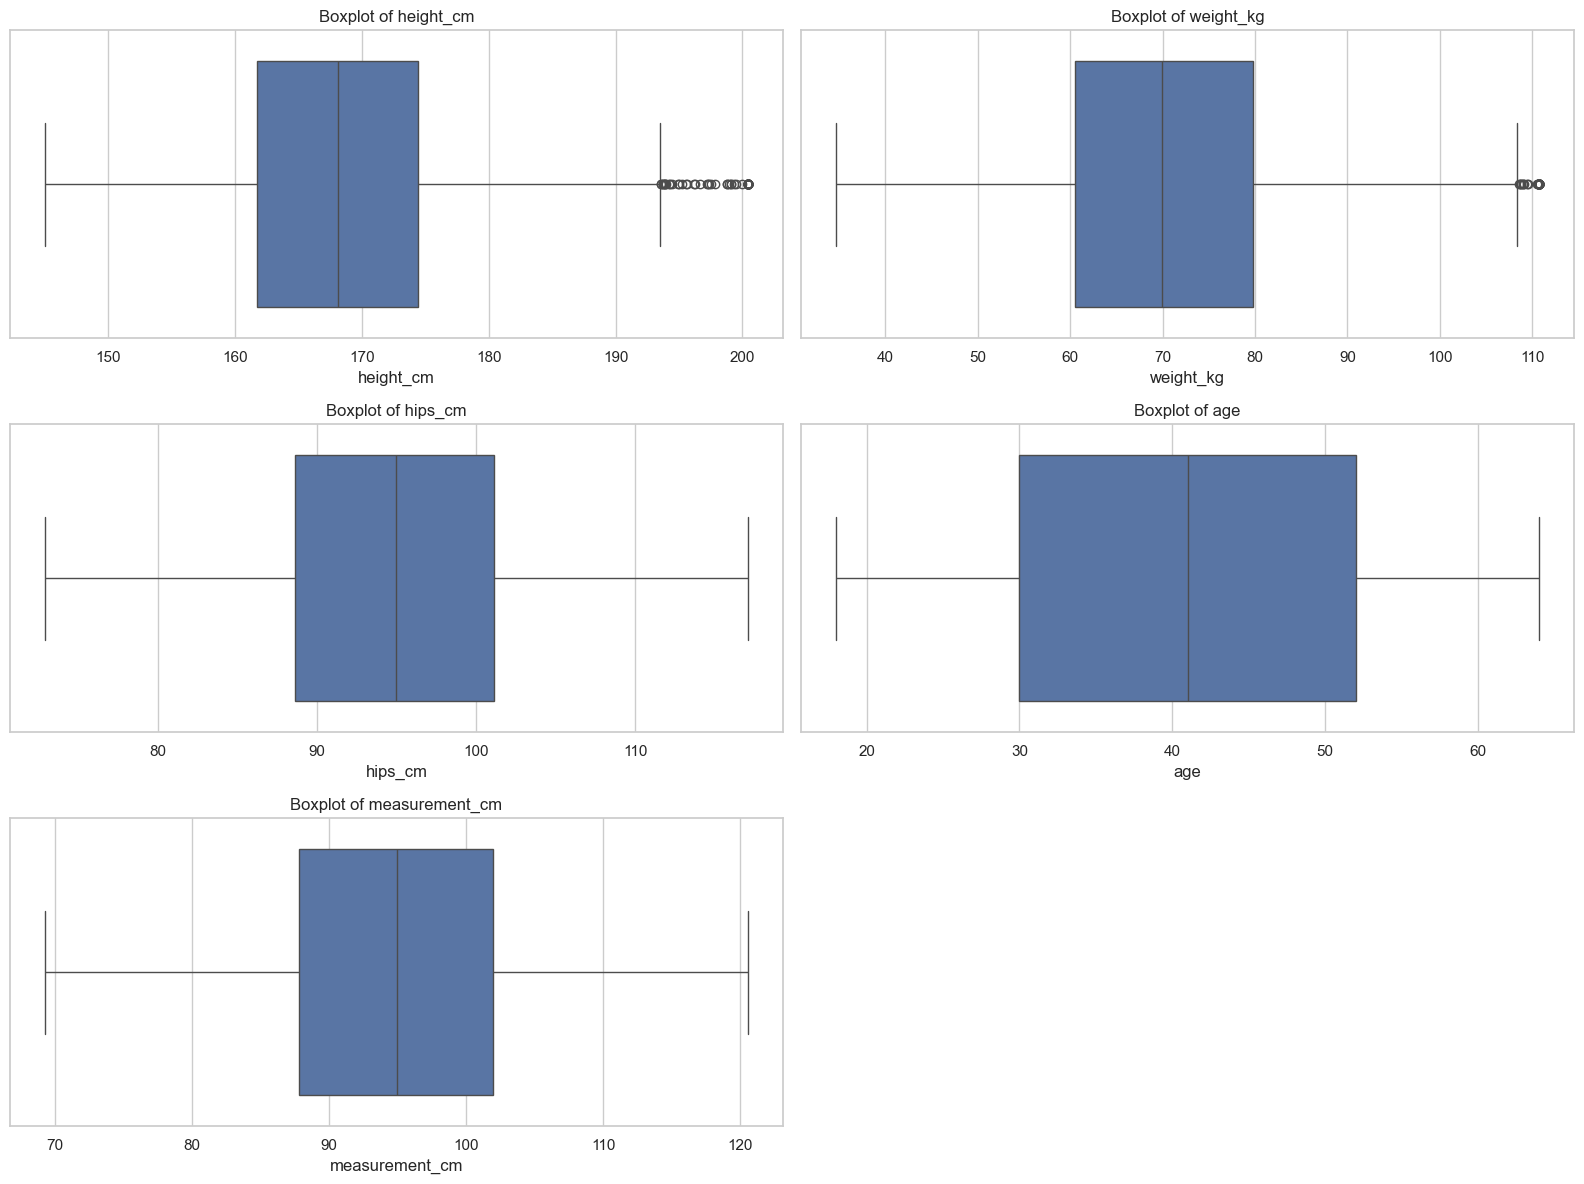

In [23]:
#after winsorization
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

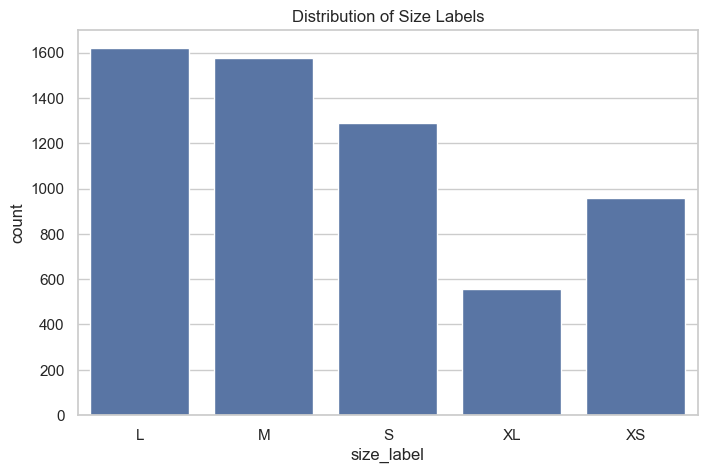

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='size_label', order=sorted(df['size_label'].unique()))
plt.title('Distribution of Size Labels')
plt.show()

In [25]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
df.head()

,height_cm,weight_kg,age,hips_cm,gender,size_label,measurement_cm
0,172.967142,53.288780,59.0,114.164543,Male,XS,100.802850
1,166.617357,60.536037,30.0,104.138267,Female,S,106.692469
2,174.476885,55.869097,58.0,109.416462,Female,S,81.157240
3,183.230299,61.780063,23.0,97.886097,Female,S,85.127791
4,165.658466,66.787745,41.0,85.230682,Female,M,92.123801


**Encode categorical values**

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode gender with saved encoder
gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])
print("Gender classes:", dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_))))

Gender classes: {'Female': np.int64(0), 'Male': np.int64(1)}


In [30]:
# Encode size label (target) with saved encoder
size_encoder = LabelEncoder()
y = size_encoder.fit_transform(df['size_label'])
print("Size label classes:", dict(zip(size_encoder.classes_, size_encoder.transform(size_encoder.classes_))))

Size label classes: {'L': np.int64(0), 'M': np.int64(1), 'S': np.int64(2), 'XL': np.int64(3), 'XS': np.int64(4)}


**Features and scaling**

In [31]:
X = df.drop(columns=['size_label'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Model Training**

In [33]:
##Importations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)

In [34]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

Split data into 80% training and 20% testing  
stratify=y: Ensures each size class is proportionally represented in both sets.  

**1. Logistic Regression**

In [35]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [36]:
# Evaluation
print("\n--- Logistic Regression ---")
print('Accuracy', accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=size_encoder.classes_))


--- Logistic Regression ---
Accuracy 0.9008333333333334
              precision    recall  f1-score   support

           L       0.89      0.94      0.92       324
           M       0.86      0.91      0.89       316
           S       0.93      0.91      0.92       258
          XL       0.83      0.68      0.75       111
          XS       0.99      0.92      0.95       191

    accuracy                           0.90      1200
   macro avg       0.90      0.87      0.89      1200
weighted avg       0.90      0.90      0.90      1200



**2. Random Forest**

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [38]:
#Evaluation
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=size_encoder.classes_))


--- Random Forest ---
Accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           L       0.96      0.96      0.96       324
           M       0.90      0.98      0.94       316
           S       0.98      0.93      0.96       258
          XL       0.96      0.91      0.94       111
          XS       0.99      0.94      0.97       191

    accuracy                           0.95      1200
   macro avg       0.96      0.95      0.95      1200
weighted avg       0.96      0.95      0.95      1200



Classification report:  
Precision: How many predicted sizes were correct?   
Recall: How many actual sizes were captured?  
F1-score: Harmonic mean of precision and recall.  
target_names=size_encoder.classes_: Uses original size labels (e.g., 'S', 'M', etc.) instead of numeric values.  

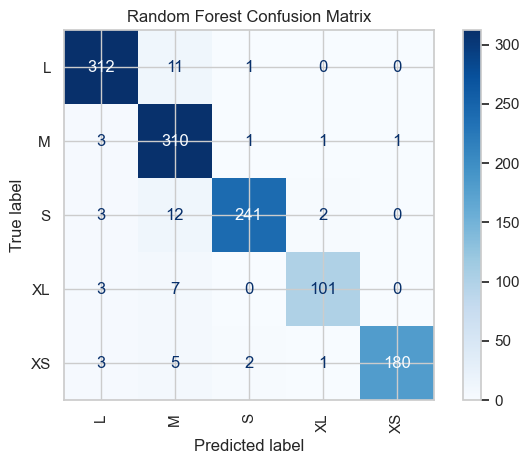

In [39]:
# confusion Matrix for random forest
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=size_encoder.classes_,
    cmap="Blues",
    xticks_rotation="vertical"
)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()